# Linear Regressions in Python

## Introduction

Linear regressions are one of the first machine learning algortithms that data scientists interact with. It is a very useful and powerful technique that can be used to predict the profitability of a certain data set. It can also help you understand customer behavior in a data set.

## 1. What is a Linear Regression?

The goal of making a linear regression is to find a relationship between one or more features (the independent variables) and a continuous target variable (the dependent variable). They typically look like this (the values on the x and y axes can be changed):
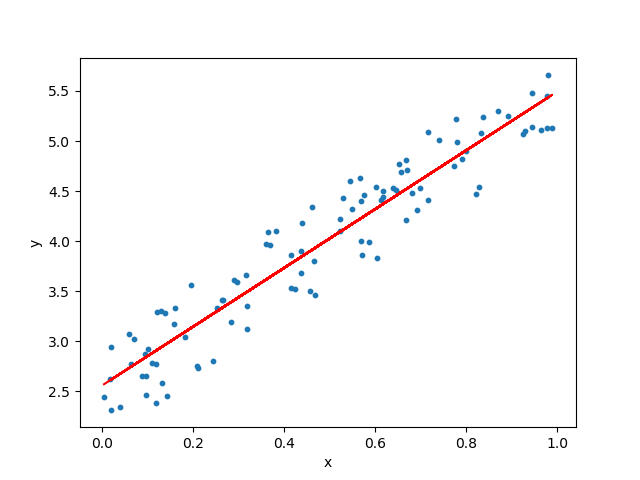

### 1a. Hypothesis of a Linear Regression

The linear regression model (or line of best fit) can be represented by the following equation:




Where:

1. Y is the predicted value
2. θ₀ is the bias term.
3. θ₁,…,θₙ are the model parameters
4. x₁, x₂,…,xₙ are the feature values.

OR:

The above hypothesis can also be represented by:




Where:

1. θ is the model’s parameter vector including the bias term θ₀
2. x is the feature vector with x₀ =1

### 1b. The Line of Best Fit

The line of best fit, or the regression line, in a linear regression is the line that is the average, or "middle", line that takes into account all the data provided (except the outliers), and it matches up best with the data in the set.

They typically look like this (the yellow line is the line of best fit):
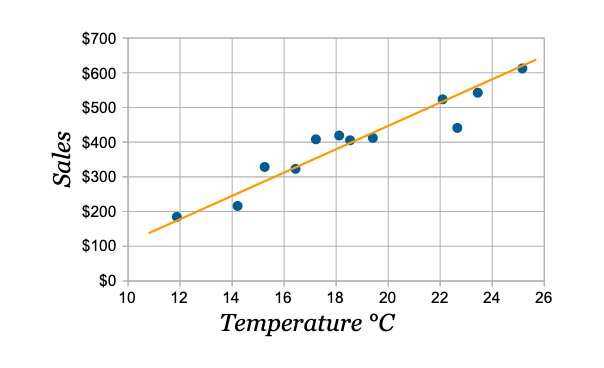

This line can help us predict future values and trends, which is a very, very useful thing in data science.

### 1c. Residuals

The distance, or error, between the predicted values and the observed values in a linear regression are called residuals. The residuals can be visualized by the vertical lines from the observed data value to the regression line, as shown:

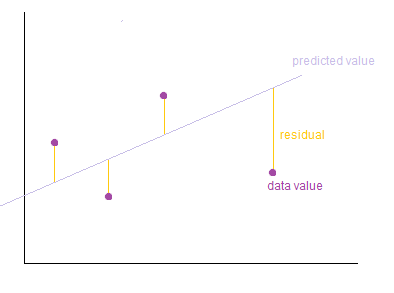

To define and measure the error of our model, we define the cost function as the sum of the squares of the residuals. The cost function is denoted by:

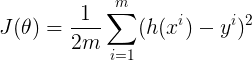

### 1d. Gradient Descent

Now, to minimize the cost function, we use gradient descent. It iteratively tweaks the parameters of the model in order to minimize the cost function, which pretty much helps you find the line of best fit better.

The steps for gradient descent:

#### Step 1:

We first initialize the model parameters with some random values. This is called *random initialization*.

#### Step 2:

Now we need to measure how the cost function changes with change in its parameters. Therefore we compute the partial derivatives of the cost function w.r.t to the parameters θ₀, θ₁, … , θₙ, as so: 

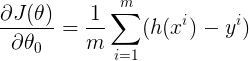
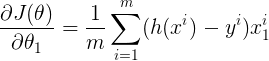

Similarly, the partial derivative of the cost function w.r.t to any parameter can be denoted by:

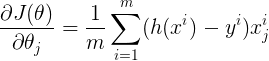

#### Step 3:

After computing the derivative we update the parameters as given below:

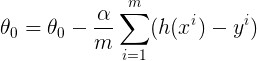
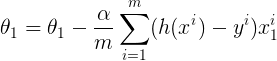

where α is the *learning parameter*.

#### Step 4: 

We repeat the steps 2,3 until the cost function converges to the minimum value. If the value of α is too small, the cost function takes a larger time to converge. If α is too large, the gradient descent may overshoot the minimum and may eventually fail to converge.

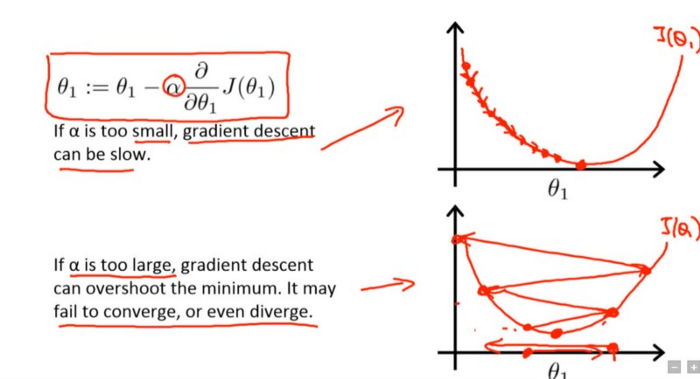

### 1e. The Correlation Coefficient

To evaluate the performance of the model, we use the Coefficient of Determination, R², and also the root mean squared error (RMSE).

1. The R² score, or the coefficient of determination/correlation coefficient, explains how much the total variance of the dependent variable can be reduced by using the least square regression. Note that -1<R<1, with -1 and 1 values for R being *perfect* fits, and as R moves closer to 0 it becomes more sparse.

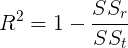

Where SSₜ is the total sum of errors if we take the mean of the observed values as the predicted value:

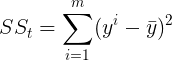

And SSᵣ is the sum of the square of residuals:

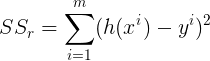

Or, in code:

In [ ]:
# sum of square of residuals
ssr = np.sum((y_pred - y_actual)**2)

#  total sum of squares
sst = np.sum((y_actual - np.mean(y_actual))**2)

# R2 score
r2_score = 1 - (ssr/sst)

2. RMSE is the square root of the average of the sum of the squares of residuals, as shown below:

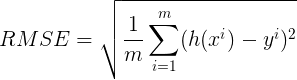

Or, in code:

In [ ]:
# mean squared error
mse = np.sum((y_pred - y_actual)**2)

# root mean squared error
# m is the number of training examples
import numpy as np
rmse = np.sqrt(mse/m)

NOTE: If R²=k, then we reduced the prediction error by k% by using regression.

## 2. Real Life Example:

We'll be using the Housing data set (which contains information about houses in Boston) for this subject on linear regressions.

### 2a. Importing the Data Set

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

# we now load the housing data from the scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston() # boston_dataset is a dictionary
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Above, the keys are as follows:

1. data: contains the information for various houses

2. target: prices of the house

3. feature_names: names of the features

4. DESCR: describes the dataset

More features can be found by:

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

NOTE: the median prices of the homes indicated by the variable MEDV is our *target variable* and the remaining are the *feature variables* based on which we will predict the value of a house.

### 2b. Loading the Data

Now, we will load the data:

In [4]:
boston=pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Notice that the target value MEDV is missing from the data, so we create a new column of target values and add it to the dataframe.

In [5]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now the MEDV value is in the dataframe.

### 2c. Data Preprocessing

This step won't take that long, but after loading the data, it’s a good practice to see if there are any missing values in the data. 

We count the number of missing values for each feature using isnull():

In [6]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the dataset, which is good.

### 2d. Exploratory Data Analysis

Exploratory Data Analysis is a very important step to take before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

#### Step 1: Plot the Distribution

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

/Users/jadenchen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


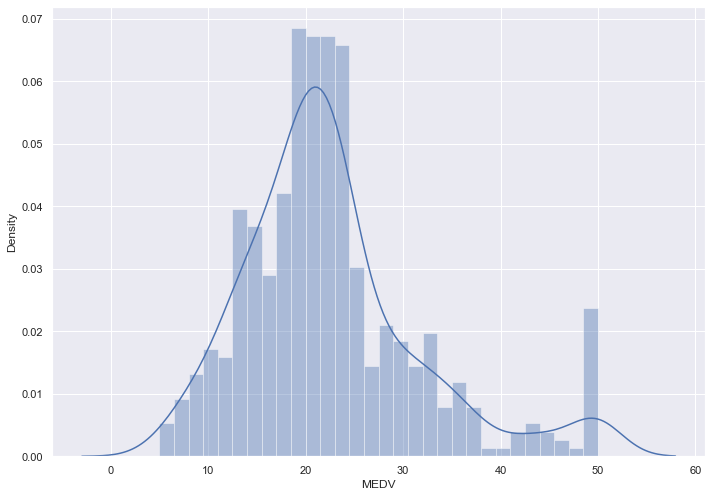

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers.

#### Step 2: Create a Correlation Matrix

Now, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the Pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

<AxesSubplot:>

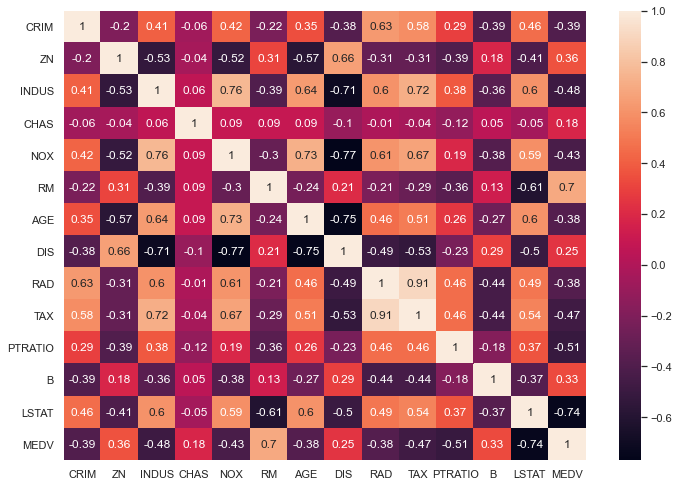

In [8]:
correlation_matrix = boston.corr().round(2)
# We put annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### Step 3: Make Observations

Observations from the correlation matrix:

-To fit a linear regression model, we select the features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7), and that LSTAT has a high negative correlation with MEDV(-0.74).

-An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model, and the same goes for the features DIS and AGE which have a correlation of -0.75.

#### Step 4: Create a Scatter Plot

Based on the above observations we will use RM and LSTAT as our features. Using a scatter plot, let’s see how these features vary with MEDV.

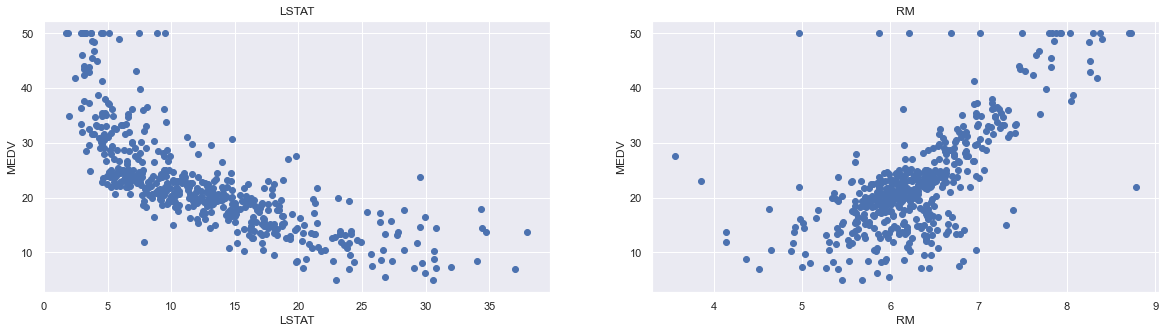

In [9]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### Step 5: Make More Observations

Observations from the scatter plots:

LSTAT:

-The median prices (MEDV) tend to decrease with an increase in LSTAT, though it doesn’t look to be following a linear line exactly.

RM:

-The median prices (MEDV) increase as the value of RM increases linearly. There are also few outliers and the data seems to be capped at 50.

### 2e. Training the Data

#### Step 1:  Prepare the Data

To prepare the data for training, we  first concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [10]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

#### Step 2: Split the Data into Training and Testing Sets

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use the train_test_split function provided by the scikit-learn library, and then we finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


#### Step 3: Training and Testing the Model

We use scikit-learn’s LinearRegression function to train our model on both the training and test sets.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

#### Step 4: Model Evaluation

Then, we will evaluate our model using the RMSE and R2-score.

In [23]:
from sklearn.metrics import r2_score

# this is the model evaluation for the training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Model Performance for the Training Set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# this is the model evaluation for the testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Model Performance for the Testing Set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Model Performance for the Training Set:
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


Model Performance for the Testing Set:
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952
